<a href="https://colab.research.google.com/github/byarciptap/Time_Series_Predictions/blob/main/time_series_predictions_with_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Temperature Predictions with LSTM**

Name : Byar Cipta Pakartilinuwih

Profile Dicoding : https://www.dicoding.com/users/byarcipta/academies

# **About the Project**
This notebook was created to fulfill the project of the course Dicoding: *Belajar Pengembangan Machine Learning*, "Proyek Kedua : Membuat Model Machine Learning dengan Data Time Series". As additional information, this project will use Artificial Neural Networks with Tensor Flow and Sequential models

# **Summary**

in this Climate dataset, we use Sequential Model along with Keras LSTM. After 36 epochs we get an mean absolute error 4% on train set.

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# **Reading Data**

In [ ]:
# Reading Data
climate_data = '/content/drive/MyDrive/Dicoding/Belajar Pengembangan Machine Learning/DailyDelhiClimate.csv'
df = pd.read_csv(climate_data)
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
# Set date column as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# **Exploration Data Analysis**

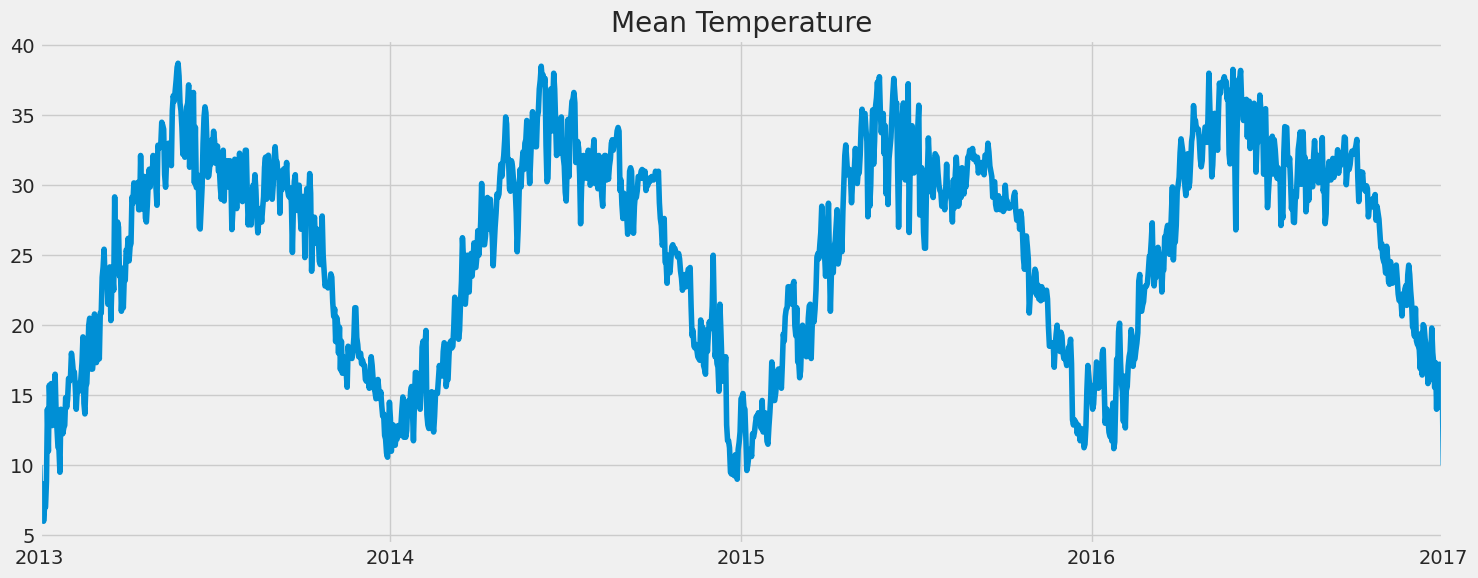

In [ ]:
# Exploration
# Show mean temp chart
plt.figure(figsize=(15, 6))
df['meantemp'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Mean Temperature")
plt.tight_layout()
plt.show()

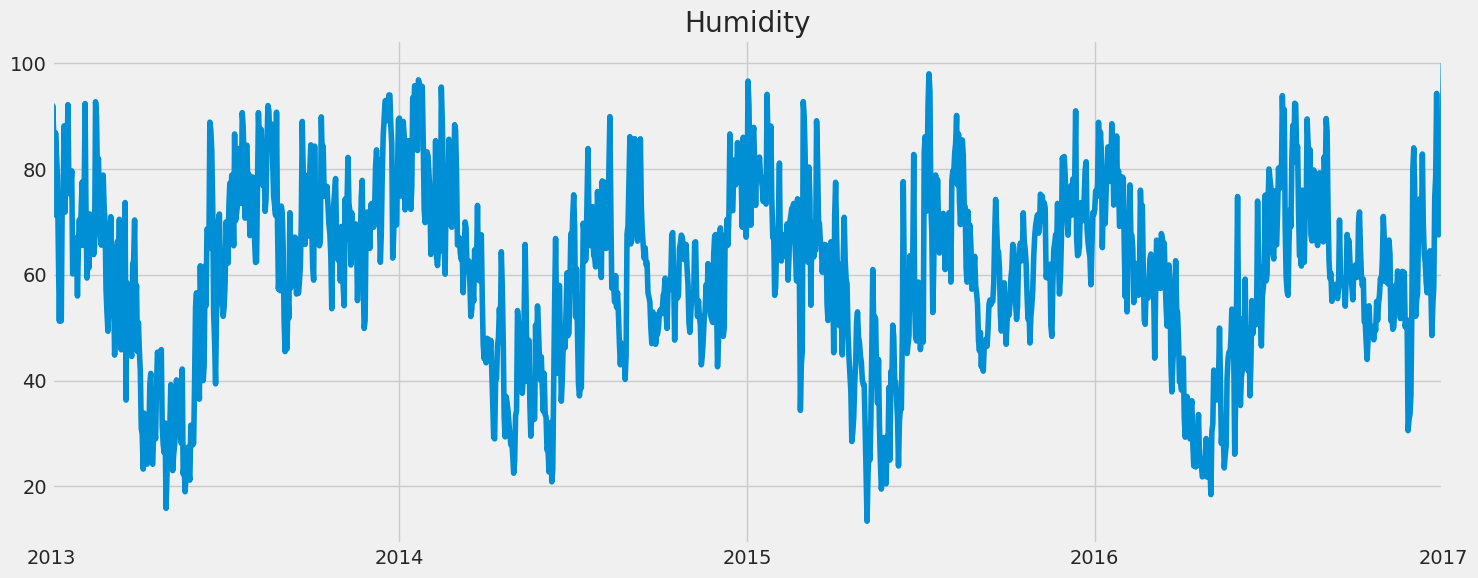

In [ ]:
# Show mean humidity chart
plt.figure(figsize=(15, 6))
df['humidity'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Humidity")
plt.tight_layout()
plt.show()

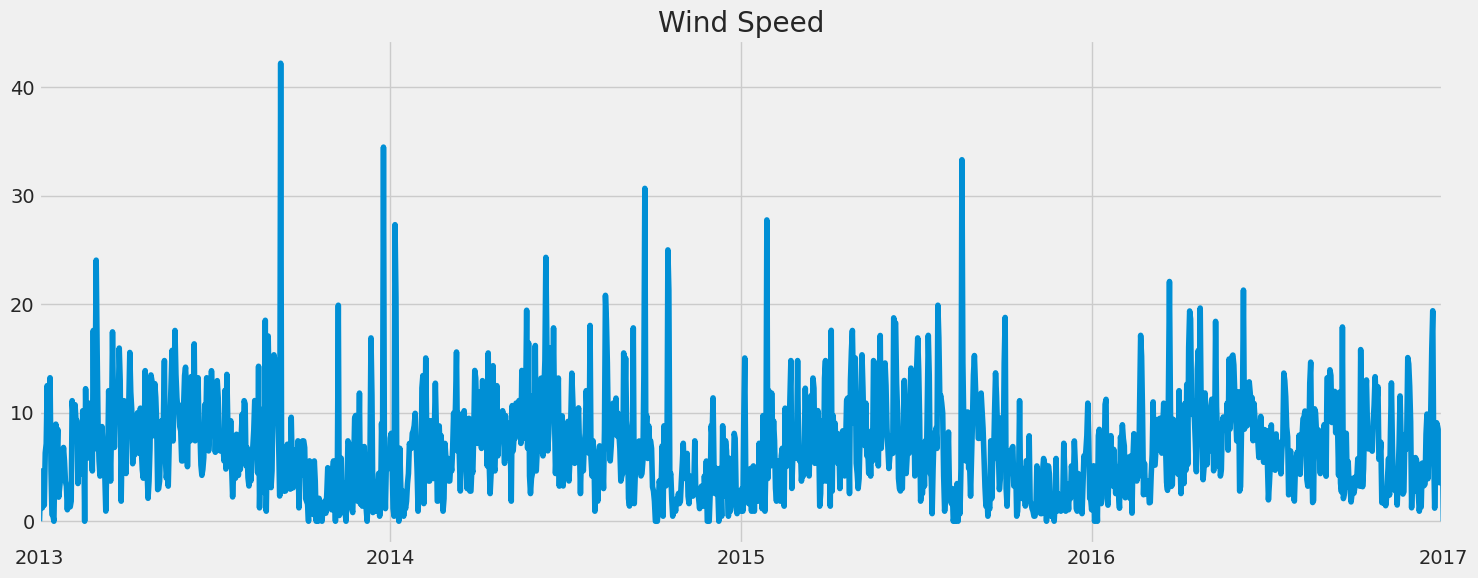

In [ ]:
# Show mean wind speed chart
plt.figure(figsize=(15, 6))
df['wind_speed'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Wind Speed")
plt.tight_layout()
plt.show()

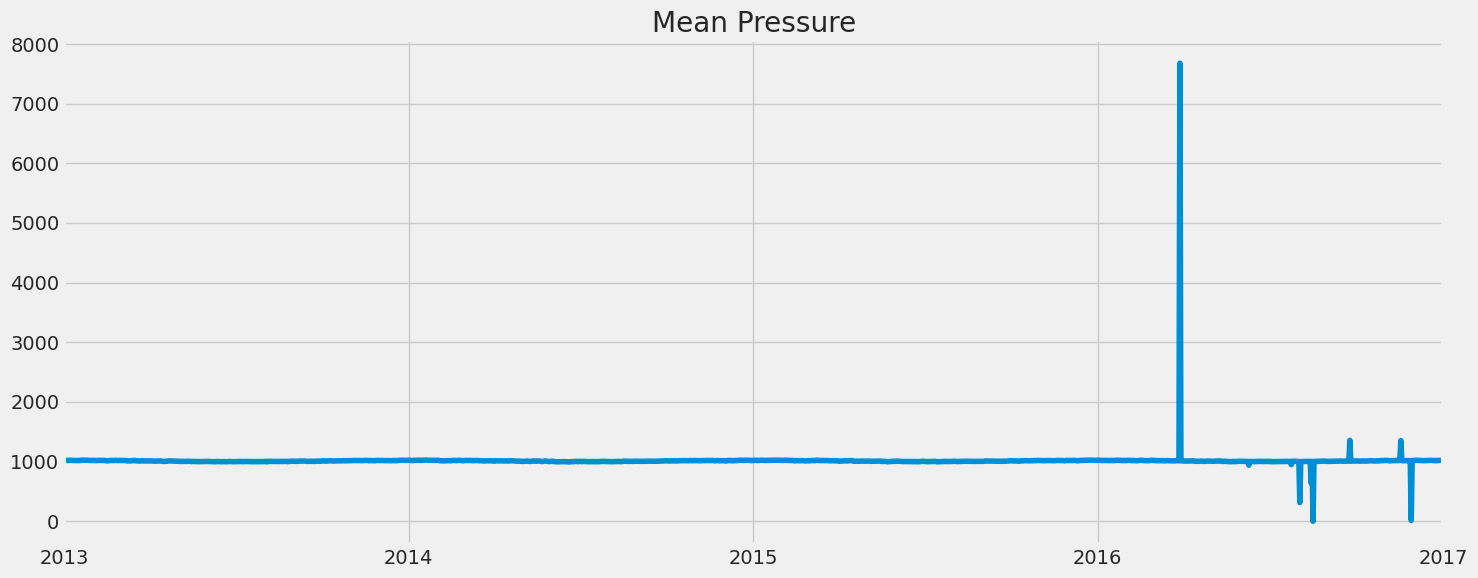

In [ ]:
# Show mean pressure chart
plt.figure(figsize=(15, 6))
df['meanpressure'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title("Mean Pressure")
plt.tight_layout()
plt.show()

# **Data Pre-processing**

In [ ]:
# Choosing prediction column
target_column_name = 'meantemp'
n_cols = 1

# Selecting the target column
target_column_data = df[target_column_name]
target_column_data = pd.DataFrame(target_column_data)
target_column_values = target_column_data.values

In [ ]:
# Normalizing data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(target_column_values))

In [ ]:
# Splitting Data
train_size = int(len(target_column_values) * 0.8)
test_size = len(target_column_values) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 1169 Test Size : 293


In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1169, 1)

In [ ]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])

In [ ]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [ ]:
x_train.shape , y_train.shape

((1402, 60, 1), (1402, 1))

# **Data Modelling**

In [ ]:
# Model Structure
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], n_cols)),
    LSTM(64, return_sequences=False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=["mean_absolute_error"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 64)                29440     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model callback to stop training if accuracy > 0.98
class EarlyStopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mean_absolute_error') < 0.04:
            print("\nThe model mse has lower than 4%, training data is stopped.")
            self.model.stop_training = True

In [ ]:
# Model Training
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    callbacks=[EarlyStopCallback()]
                    )

Epoch 1/100
44/44 [==============================] - 7s 54ms/step - loss: 0.0297 - mean_absolute_error: 0.1247
Epoch 2/100
44/44 [==============================] - 2s 54ms/step - loss: 0.0055 - mean_absolute_error: 0.0593
Epoch 3/100
44/44 [==============================] - 3s 62ms/step - loss: 0.0049 - mean_absolute_error: 0.0553
Epoch 4/100
44/44 [==============================] - 4s 84ms/step - loss: 0.0047 - mean_absolute_error: 0.0543
Epoch 5/100
44/44 [==============================] - 2s 54ms/step - loss: 0.0047 - mean_absolute_error: 0.0541
Epoch 6/100
44/44 [==============================] - 2s 54ms/step - loss: 0.0047 - mean_absolute_error: 0.0539
Epoch 7/100
44/44 [==============================] - 2s 54ms/step - loss: 0.0045 - mean_absolute_error: 0.0526
Epoch 8/100
44/44 [==============================] - 2s 55ms/step - loss: 0.0043 - mean_absolute_error: 0.0514
Epoch 9/100
44/44 [==============================] - 4s 89ms/step - loss: 0.0046 - mean_absolute_error: 0.0529
E

# **Model Evaluation**

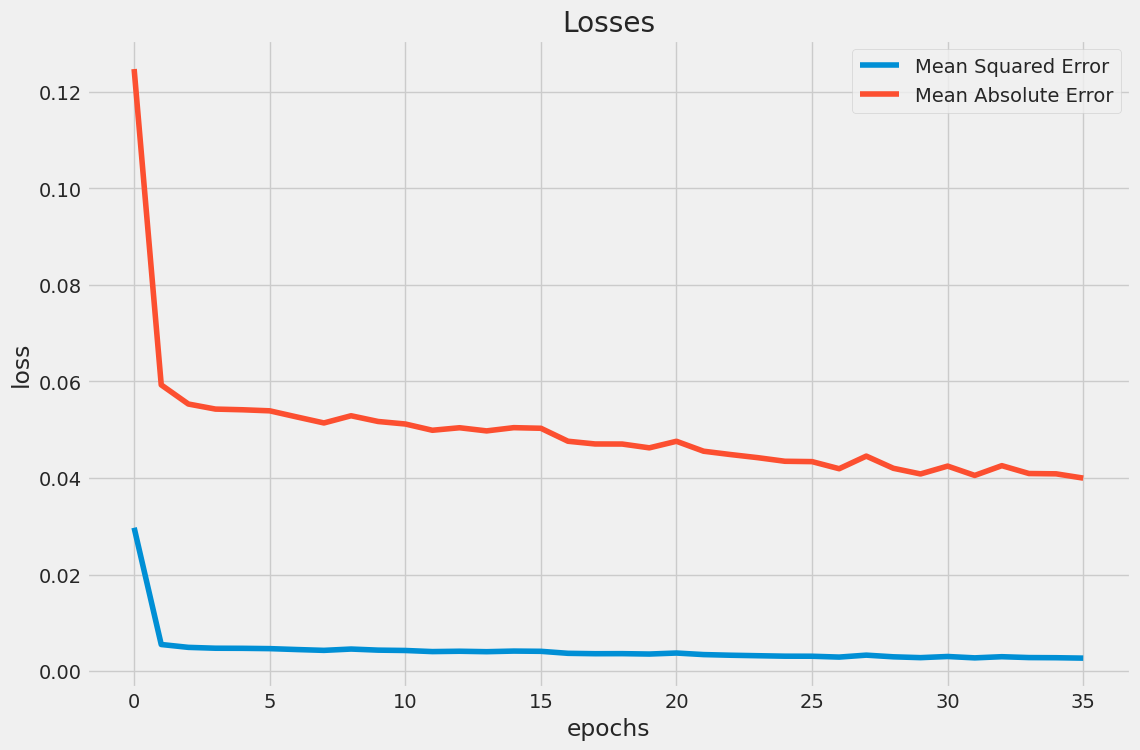

In [ ]:
# Model evaluation
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# **Prediction**

In [ ]:
# Creating a testing set with 60 time-steps and 1 output
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [ ]:
# Get Prediction
predictions = model.predict(x_test)

10/10 [==============================] - 1s 17ms/step


In [ ]:
predictions.shape

(293, 1)

In [ ]:
#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

(293, 1)

## Root Mean Square Error (RMSE)

In [ ]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [ ]:
rmse_value = np.sqrt(np.mean( y_test - predictions )**2).round(2)
rmse_value

0.65

In [ ]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,24.137617,24.066667
1,24.546982,23.937500
2,24.746084,26.312500
3,26.130100,26.187500
4,26.657816,26.785714
...,...,...
288,16.970764,17.217391
289,17.332993,15.238095
290,16.584898,14.095238
291,15.574381,15.052632


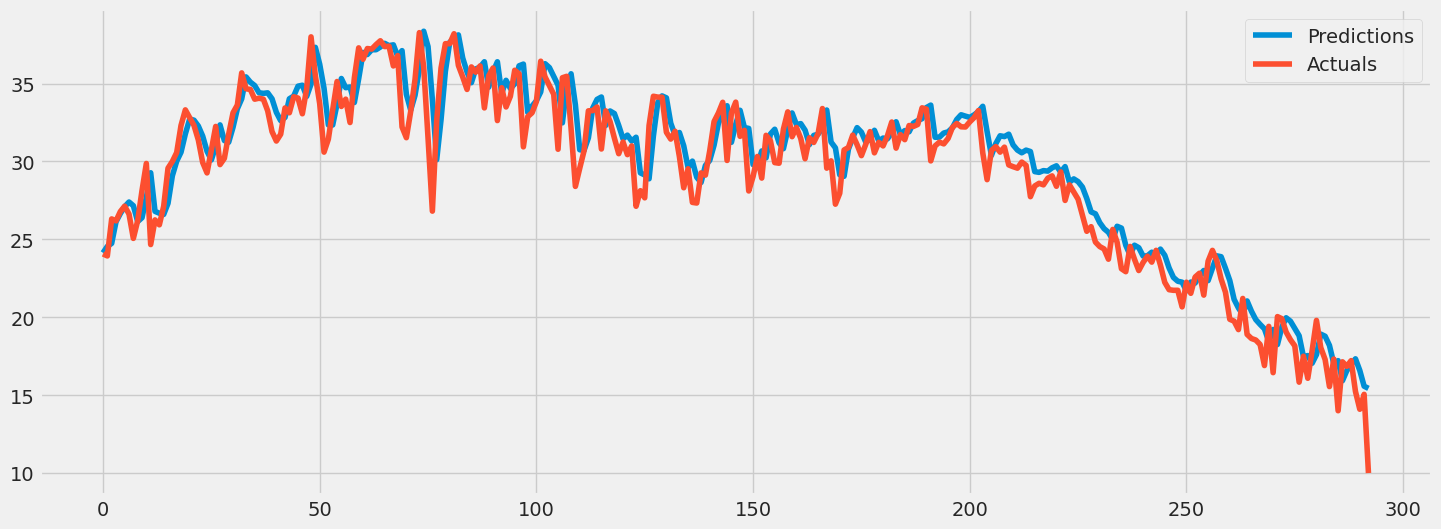

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

## Visualize Predictions

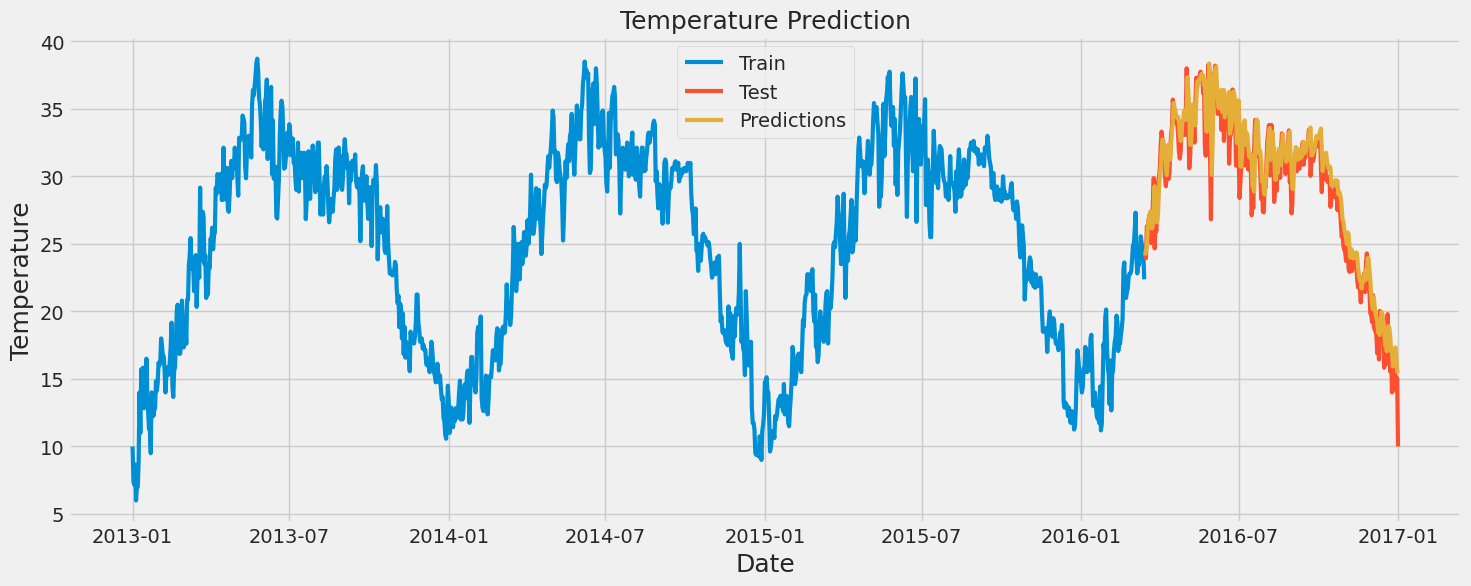

In [ ]:
train = target_column_data.iloc[:train_size , 0:1]
test = target_column_data.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Temperature Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Temperature', fontsize= 18)
plt.plot(train['meantemp'], linewidth= 3)
plt.plot(test['meantemp'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])